In [15]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [6]:
df_clean = pd.read_excel('df_clean.xlsx')

In [8]:
demo_feature = ['female', 'black', 'asian', 'hispanic', 'native']
industry_feature = ['profserv', 'advmktg', 'nonprof', 'realestate', 'consulting', 'govt',
       'consumer', 'retail', 'tech', 'other', 'educ', 'entertain', 'energy',
       'health', 'manuf']
value_feature = ['speed_vec', 'optimism_vec', 'change_vec',
       'holistic_vec', 'creative_vec']

X_feature = demo_feature + industry_feature + value_feature
y_feature = ['promotion', 'prevention']

# Regression

In [11]:
# Create X matrix
X = df_clean[X_feature]

# Add constant term
X_const = sm.add_constant(X)

# Dependent variable
y1 = df_clean['promotion']
y2 = df_clean['prevention']

In [ ]:
# Fit the model
model1 = sm.OLS(y1, X_const).fit()
model2 = sm.OLS(y2, X_const).fit()

In [ ]:
print(model1.summary())
print(model2.summary())

# Random Forest

In [12]:
# Initialize models
rf1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf1.fit(X, y1)
rf2.fit(X, y2)

RandomForestRegressor(random_state=42)

In [13]:
print("R² (promotion):", r2_score(y1, rf1.predict(X)))
print("R² (prevention):", r2_score(y2, rf2.predict(X)))

R² (promotion): 0.8552399058443224
R² (prevention): 0.8559699810856987


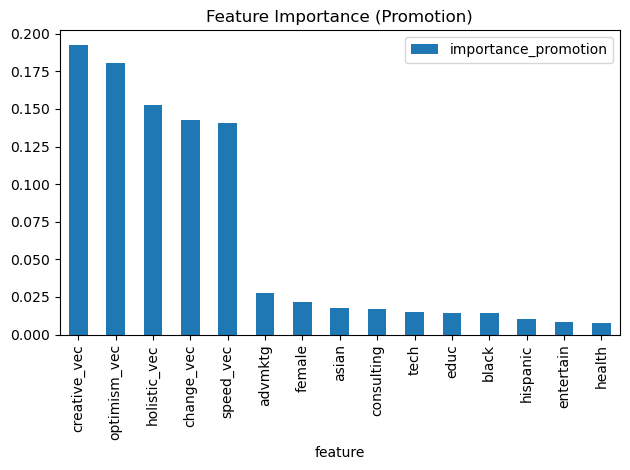

In [16]:
feat_importance = pd.DataFrame({
    'feature': X.columns,
    'importance_promotion': rf1.feature_importances_,
    'importance_prevention': rf2.feature_importances_,
})

# 排序
feat_importance = feat_importance.sort_values(by='importance_promotion', ascending=False)

# 可视化（前15个）
feat_importance.head(15).plot.bar(x='feature', y='importance_promotion', title='Feature Importance (Promotion)')
plt.tight_layout()
plt.show()